<a href="https://colab.research.google.com/github/jsleeg98/deeplearning_from_scratch/blob/main/ch3_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.1 퍼셉트론에서 신경망으로


## 3.1.1 신경망의 예
퍼셉트론이 여러 층으로 연결되어 있는 것을 신경망이라고 부릅니다.

첫번째 층을 입력층, 마지막 층을 출력층, 그 사이에 있는 층을 은닉층이라고 합니다.

## 3.1.2 퍼셉트론 복습
퍼셉트론에는 가중치와 편향이 있습니다. 편향은 뉴런이 얼마나 쉽게 활성화되는지를 제어하고 가중치는 각 신호의 중요도를 제어합니다.

## 3.1.2 활성화 함수의 등장
입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화 함수(activation function)이라고 합니다. 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지 정하는 역할을 합니다.

# 3.2 활성화 함수
활성화 함수는 임계값을 경계로 출력이 바뀌는데 이런 함수를 계단 함수(step function)이라고 합니다. 퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다고 생각할 수 있습니다.

## 3.2.1 시그모이드 함수
신경망에서 자주 이용하는 활성화 함수의 하나인 시그모이드 함수 입니다.(sigmoid function)입니다.

$h(x)=\frac{1}{1+exp(-x)}$

## 3.2.2 계단 함수 구현하기
계단함수는 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수 입니다.

In [ ]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

위의 함수는 하나의 입력만 받을 수 있는 함수 입니다. 

우리는 한번에 여러 입력을 받을 수 있는 numpy 배열을 입력 받을 수 있도록 수정해야합니다.

In [ ]:
import numpy as np
# numpy 배열을 위한 구현
def step_function(x):
    # y = x > 0
    # return y.astype(np.int)
    return np.array(x > 0, dtype=np.int)

In [ ]:
x = np.array([-1, 2, 0])
print(step_function(x))

[0 1 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


## 3.2.3 계단 함수의 그래프
matplotlib 라이브러리를 사용하여 계단 함수의 그래프를 그려보겠습니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


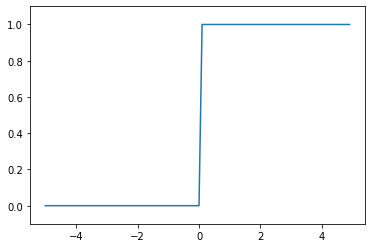

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

## 3.2.4 시그모이드 함수 구현하기

In [ ]:
# 3.2.4 시그모이드 함수 구현하기
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

시그모이드 함수 그래프 그리기

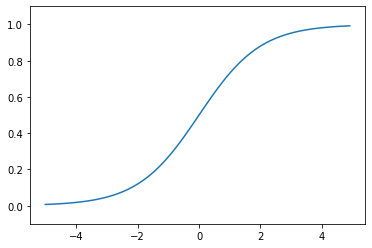

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

## 3.2.5 시그모이드 함수와 계단 함수 비교

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


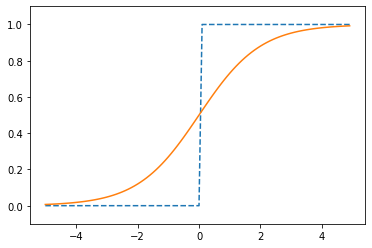

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)

plt.plot(x, y1, linestyle='--')
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()

시그모이드 함수와 계단 함수의 눈에 띄는 차이는 매끄러움의 차이이다. 계단 함수는 0을 경계로 출력이 갑자기 바뀌고 시그모이드는 매끈하게 값이 변하며 이는 신경망 고 입력이 학습에서 중요한 역할을 합니다. 

두 함수의 공통점은 입력이 작을 때는 출력이 0에 가깝고 입력이 클 대는 출력이 1에 가깝습니다. 또한 입력이 아무리 작거나 커도 출력은 0과 1사이라는 것이 공통점입니다.

## 3.2.6 비선형 함수
계단 함수와 시그모이드 함수 모두 비선형함수라는 중요한 공통점이 있습니다. 

신경망에서는 활성화 함수로 반드시 비선형 함수를 사용해야 합니다. 그 이유는 만약 선형함수를 사용하여 아무리 층을 깊게 하여도 결국에는 하나의 선형함수로 변환할 수 있어 아무 의미가 없기 때문입니다. 따라서 비선형 함수를 활용하여 층을 깊게 한다면 그만큼 다양한 것을 표현하게 합니다.

## 3.2.7 ReLU 함수
ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고 0이하이면 0을 출력하는 함수 입니다.

In [ ]:
def ReLU(x):
  return np.maximum(0, x)

ReLU 함수 그리기

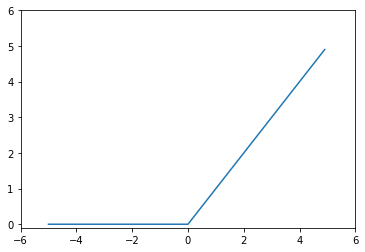

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)

plt.plot(x, y)
plt.xlim(-6, 6)
plt.ylim(-0.1, 6)  # y축의 범위 지정
plt.show()

# 3.3 다차원 배열의 계산

## 3.3.1 다차원 배열
다차원 배열은 '숫자의 집합'이다.

In [ ]:
A = np.array([1, 2, 3, 4])
print(A)  # [1 2 3 4]
print(np.ndim(A))  # 1
print(A.shape)  # (4,)

[1 2 3 4]
1
(4,)


* np.ndim() 함수를 이용하여 배열의 차원을 확인할 수 있다.
* shape을 활용하여 배열의 형상을 확인할 수 있다. 그리고 이 때 튜플의 형태로 반환한다.

In [ ]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))  # 2
print(B.shape)  # (3, 2)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


## 3.3.2 행렬의 곱
행렬의 곱은 왼쪽 행렬의 행(가로)과 오른쪽 행렬의 열(세로)을 원소별로 곱하고 그 값들을 더해서 계산합니다. 따라서 왼쪽 행렬의 열의 개수는 오른쪽 행렬의 행의 개수와 동일해야 계산이 가능합니다.

In [ ]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])  # (2, 3)
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])  # (3, 2)
print(B.shape)
print(np.dot(A, B))  # (2, 2)

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


## 3.3.3 신경망에서의 행렬 곱
신경망도 똑같이 행렬 곱으로 구현할 수 있다.

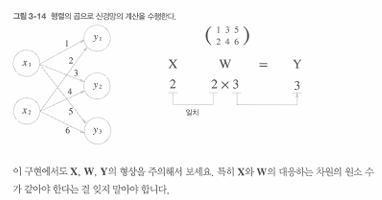

In [ ]:
X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


# 3.4 3층 신경망 구현하기


## 3.4.3 구현 정리
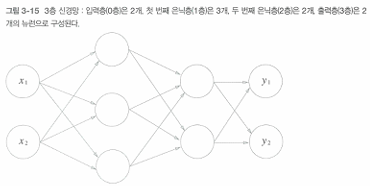

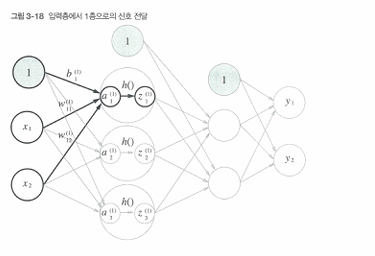

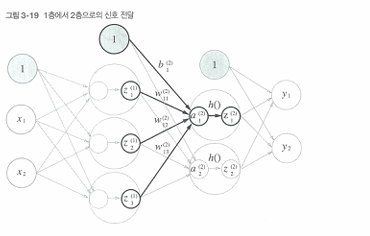

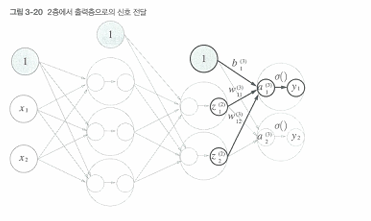

In [ ]:
def identity_function(x):
  return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)  # [ 0.31682708  0.69627909]

print(y)

[0.31682708 0.69627909]


# 3.5 출력층 설계하기
신경망은 분류와 회귀 모두에 이용할 수 있습니다. 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라집니다. 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용합니다.

* 분류 문제 : 데이터가 어느 클래스에 속하는 지 판별하는 문제(예시: 개과 고양이 구분하기)
* 회귀 문제 : 입력에 대해서 수치를 예측하는 문제(예시: 온도 예측)

## 3.5.1 항등 함수와 소프트맥스 함수 구현하기
* 항등 함수는 입력을 그대로 출력하는 것입니다.
* 소프트맥스 함수는 다음과 같습니다.

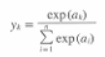

항등함수 구현

In [ ]:
def identity_function(x):
  return x

## 3.5.2 소프트맥스 함수 구현 시 주의점
소프트맥스 함수에서는 지수 함수를 활용합니다. 이때 지수 함수의 입력으로 1000만 들어가도 컴퓨터가 표현할 수 있는 숫자의 범위를 넘어 오버플로우 문제가 나타날 수 있습니다. 따라서 입력 신호 중 최대 값인 c를 빼주어 오버플로우가 발생하는 것을 방지해야합니다.


In [ ]:
# 오버플로우를 방지하는 않은 소프트맥스 함수
def softmax_bad(a):
    exp_a = np.exp(a)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [ ]:
# 오버플로우를 방지한 소프트맥스 함수
def softmax(a):
    c = np.max(a)  # 입력 값 중 최대
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [ ]:
print(softmax_bad(np.array([1010, 1000, 900])))
print(softmax(np.array([1010, 1000, 900])))

[nan nan nan]
[9.99954602e-01 4.53978687e-05 1.68883521e-48]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


## 3.5.3 소프트맥스 함수의 특징

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)  # [ 0.01821127  0.24519181  0.73659691]
print(np.sum(y))  # 1.0

[0.01821127 0.24519181 0.73659691]
1.0


* 출력이 0와 1.0 사이의 실수이다.
* 출력의 총합이 1이다. 따라서 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다! 그래서 소프트맥스 함수를 분류 문제에서 사용하여 각 클래스별 확률을 얻고 그 중 가장 높은 확률을 예측 클래스로 정의할 수 있는 것이다.

* 추가적으로 소프트맥스 함수는 단조 증가 함수이기 때문에 원래의 입력 값에 대한 대소 관계가 바뀌지 않는다. 따라서 현업에서는 지수 함수에서의 계산 과정을 단축시키고자 소프트맥스 함수를 사용하지 않고 단순히 최대값을 추출하여 활용하기도 한다.

## 3.5.4 출력층의 뉴런 수 정하기
출력층의 뉴런 수는 풀려는 문제에 맞게 적절하게 정해야합니다. 만약 이미지를 숫자 0부터 9 중 하나로 분류하는 문제라면 총 10개의 클래스에 대한 확률을 구해야하기 때문에 출력층의 뉴런을 10개로 설정해야합니다.

# 3.6 손글시 숫자 인식
이미 학습된 매개변수를 사용하여 학습과정은 생략하고 추론 과정만 구현할 것이다. 이 추론 과정을 신경망의 순전파(forward propagation)라고도 합니다.

## 3.6.1 MNIST 데이터셋
MNIST 데이터 셋은 손글씨 숫자 이미지 집합입니다. 이는 기계학습 분야에서 아주 유명한 데이터셋입니다.
* 0부터 9가지의 숫자 이미지로 구성된다.
* 훈련 이미지 60,000장, 시험 이미지 10,000장
* 이미지 크기 28 x 28 
* 이미지 채널 수 1(gray)
* 값은 0~255


**아래 코드는 밑바닥부터 시작하는 딥러닝 github를 가져오는 코드 입니다. 단 한번만 실행해주세요**

한번 수행 이후에는 오류 발생 (상관 없음)

In [ ]:
!git clone https://github.com/youbeebee/deeplearning_from_scratch.git
!mv ./deeplearning_from_scratch/dataset/ ./
!mv ./deeplearning_from_scratch/common/ ./
!mv ./deeplearning_from_scratch/ch3.신경망/sample_weight.pkl ./

In [ ]:
import sys
import os
import pickle
import numpy as np
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

# 이미지를 numpy 배열로 저장
# flatten : 입력 이미지를 평탄화(1차원 배열로)
# normalize : 입력 이미지를 정규화(0.0~1.0 사이의 값으로)
# one_hot_label : 레이블을 원-핫 인코딩 형태로 저장
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,   
                                                  normalize=False)
 
# 각 데이터의 형상 출력
print(x_train.shape)  # (60000, 784) # 784이유는 평탄화를 하여 28x28의 이미지가 784가 되었기 때문
print(t_train.shape)  # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)                                               

(60000, 784)
(60000,)
(10000, 784)
(10000,)


5
(784,)
(28, 28)


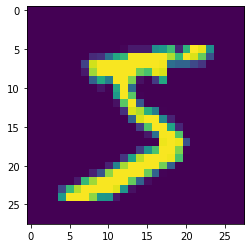

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import matplotlib.pyplot as plt

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,   
                                                  normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)  # 원래의 이미지 차원으로 변경 
print(img.shape)

plt.imshow(img)
plt.show()

## 3.6.2 신경망의 추론 처리

* 입력층의 뉴런 784 (이미지가 28x28이기 때문에 이를 평탄화 한 차원의 크기)
* 출력층의 뉴런 10
* 은닉층은 총 두 개, 첫 번째 은닉층은 50개 뉴런, 두 번째 은닉층은 100개 뉴런 배치(임의로 정한 것이다.)

In [ ]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일
        # 학습 없이 바로 추론을 수행
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [ ]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352

Accuracy:0.9352


# 3.6.3 배치 처리
입력 데이터와 가중치 매개변수의 '형상'에 주의하여 이를 출력해보면 다음과 같다.

In [ ]:
x, _ = get_data()
network = init_network()

W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


위의 결과를 보면 다차원 배열의 대응하는 차원의 원소수가 일치하는 것을 확인할 수 있습니다.

다음은 여러 이미지를 하나로 묶어 배치로 처리하는 방식을 구현한 것입니다.

이렇게 하는 이유는 컴퓨터가 큰 배열 단위로 처리하는 것에 효율적으로 되어 있어서 훨씬 빠른 속도로 처리할 수 있기 때문입니다.

In [ ]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0

batch_size = 100

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))  # Accuracy:0.9352

Accuracy:0.9352
